# Preprocessing the images

## Overview

The files are stored in /images folder. There are 3 sets of images for Covid-19, Pnuemonia and Normal

Dataset ImageFolder
    Number of datapoints: 6359
    Root location: ../data/images/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
           )
tensor([2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2])


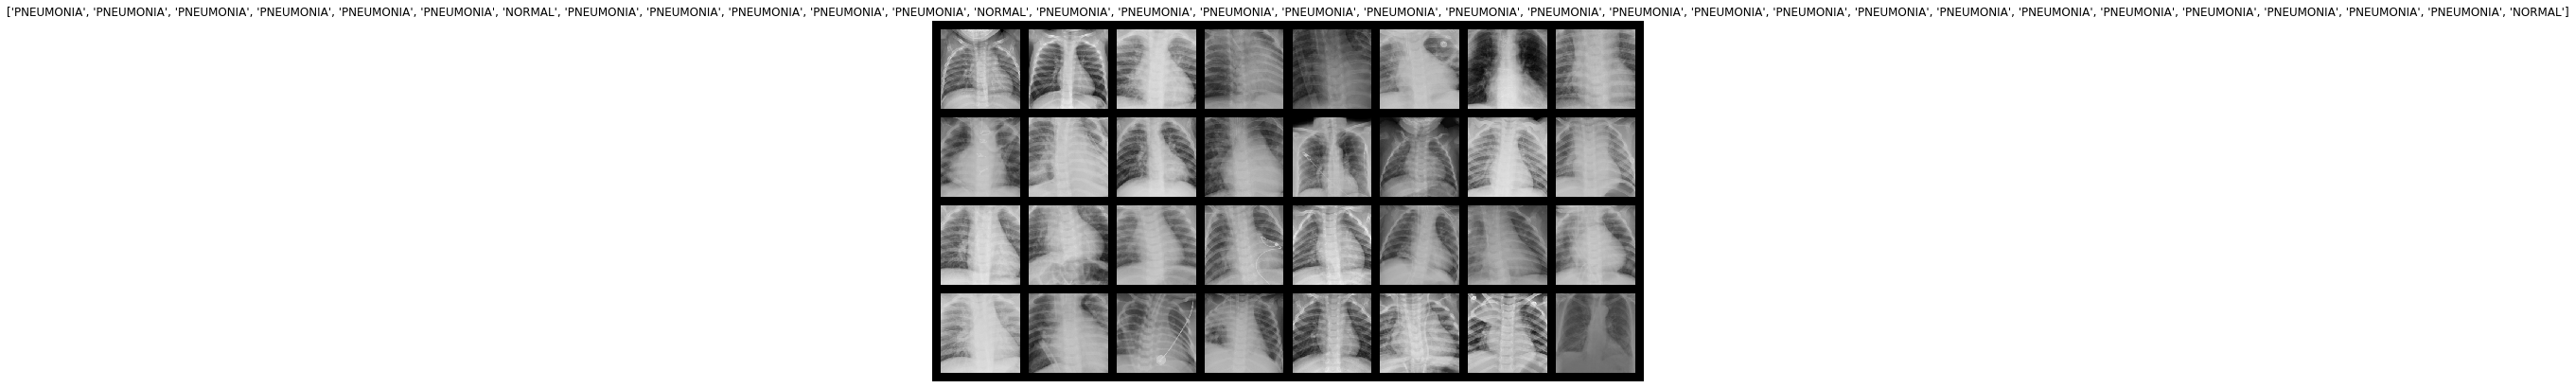

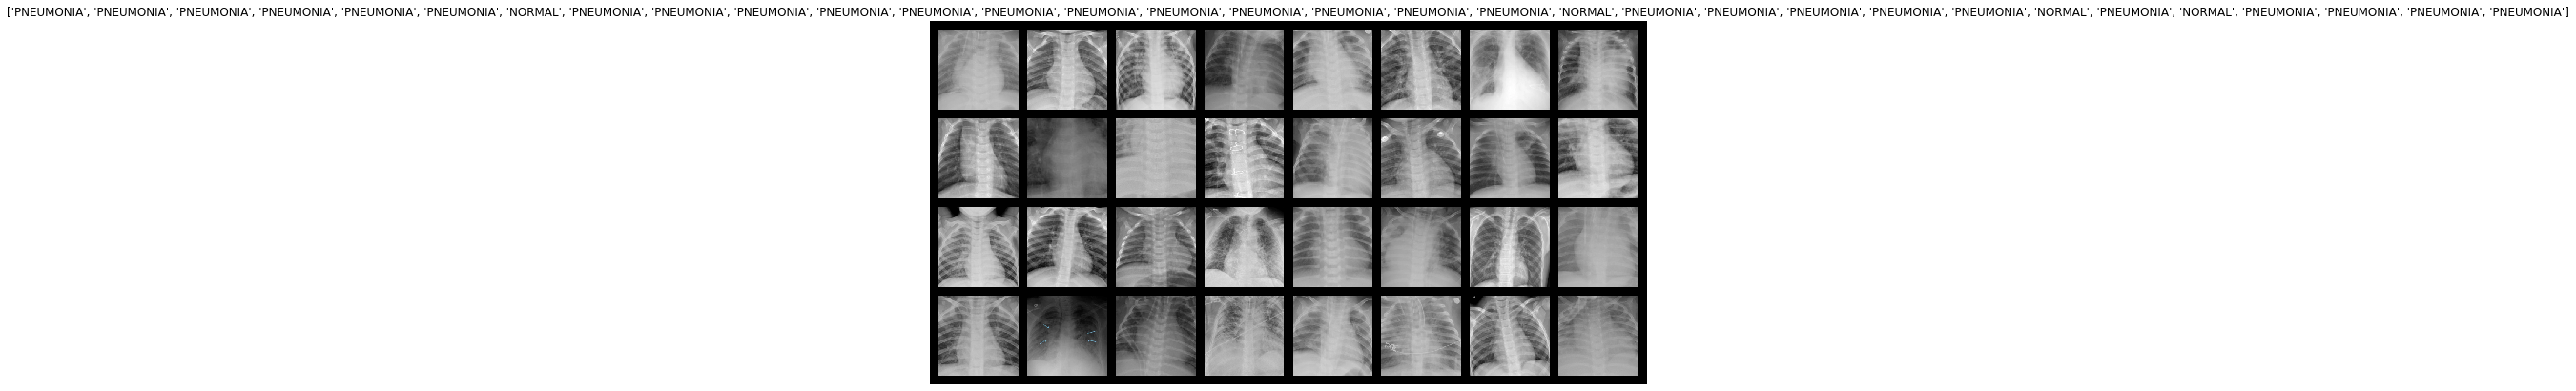

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-



import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import time; _START_RUNTIME = time.time()
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# set seed
seed = 24
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

# Define data path
IMAGE_PATH = "../data/images/"

WEIGHT_PATH = os.path.join(IMAGE_PATH, '..', 'resnet18_weights_9.pth')

"""
Show the images in 
"""

def imshow(img, title):
    npimg = img.numpy()
    plt.figure(figsize=(15, 7))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()


def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images, padding=25)
    imshow(img, title=["NORMAL" if x==0  else "PNEUMONIA" for x in labels])


"""
Preprocess

"""



transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])


dataset = torchvision.datasets.ImageFolder(IMAGE_PATH,transform=transform)
print(dataset)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

images, labels = next(iter(dataloader))

print (labels)

for i in range(2):
    show_batch_images(dataloader)



